# Cantilever beams with different element types
[![Google Collab Book](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/meyer-nils/torch-fem/blob/main/examples/basic/planar/cantilever.ipynb)

This example showcases the use of different planar element types for a simple cantilever beam.

In [1]:
import meshzoo
import numpy as np
import torch

from torchfem import Planar
from torchfem.elements import linear_to_quadratic
from torchfem.materials import IsotropicElasticityPlaneStress

# Set double precision
torch.set_default_dtype(torch.float64)

# Set default device to GPU
torch.set_default_device("cuda:0")

# Material model (plane stress)
material = IsotropicElasticityPlaneStress(E=1000.0, nu=0.3)

/home/jovyan/.conda-envs/test_torchfem/lib/python3.11/site-packages/cupy/_environment.py:540: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


## A simple cantilever beam with first order quads

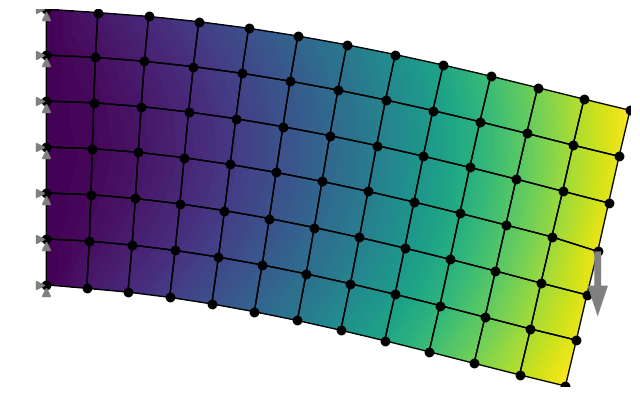

In [2]:
points, cells = meshzoo.rectangle_quad(
    np.linspace(0.0, 2.0, 13),
    np.linspace(0.0, 1.0, 7),
    cell_type="quad4",
)
nodes = torch.tensor(points, dtype=torch.get_default_dtype())
elements = torch.tensor(cells.tolist())

# Create model
cantilever = Planar(nodes, elements, material)

# Load at tip
tip = (nodes[:, 0] == 2.0) & (nodes[:, 1] == 0.5)
cantilever.forces[tip, 1] = -1.0

# Constrained displacement at left end
left = nodes[:, 0] == 0.0
cantilever.constraints[left, :] = True

# Thickness
cantilever.thickness[:] = 0.1

# Solve
u, f, σ, ε, α = cantilever.solve()

# Plot
u = u.cpu()
cantilever.nodes = cantilever.nodes.cpu()
cantilever.elements = cantilever.elements.cpu()
cantilever.forces = cantilever.forces.cpu()
cantilever.plot(u, node_property=torch.norm(u, dim=1), node_markers=True)

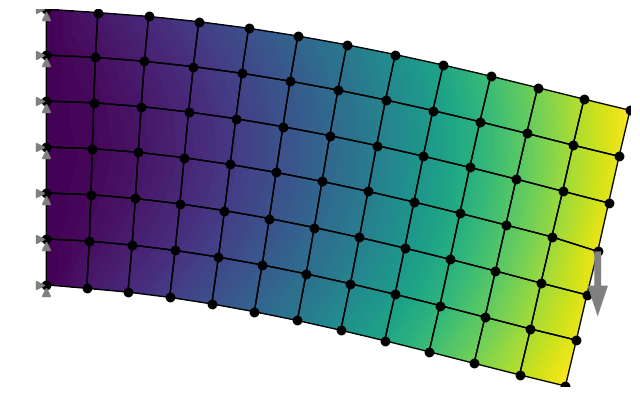

In [3]:
points, cells = meshzoo.rectangle_quad(
    np.linspace(0.0, 2.0, 13),
    np.linspace(0.0, 1.0, 7),
    cell_type="quad4",
)
nodes = torch.tensor(points, dtype=torch.get_default_dtype())
elements = torch.tensor(cells.tolist())

# Create model
cantilever = Planar(nodes, elements, material)

# Load at tip
tip = (nodes[:, 0] == 2.0) & (nodes[:, 1] == 0.5)
cantilever.forces[tip, 1] = -1.0

# Constrained displacement at left end
left = nodes[:, 0] == 0.0
cantilever.constraints[left, :] = True

# Thickness
cantilever.thickness[:] = 0.1

# Solve
u, f, σ, ε, α = cantilever.solve(preconditioner={"name": "ssor", "omega": 0.7, "filter": 1.e-5})

# Plot
u = u.cpu()
cantilever.nodes = cantilever.nodes.cpu()
cantilever.elements = cantilever.elements.cpu()
cantilever.forces = cantilever.forces.cpu()
cantilever.plot(u, node_property=torch.norm(u, dim=1), node_markers=True)

## A simple cantilever beam with second order quads

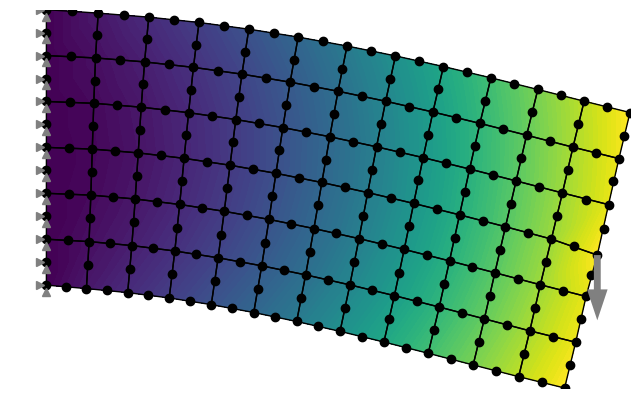

In [4]:
# Upgrade elements to quadratic
nodes, elements = linear_to_quadratic(nodes, elements)

# Create model
cantilever = Planar(nodes, elements, material)

# Load at tip
tip = (nodes[:, 0] == 2.0) & (nodes[:, 1] == 0.5)
cantilever.forces[tip, 1] = -1.0

# Constrained displacement at left end
left = nodes[:, 0] == 0.0
cantilever.constraints[left, :] = True

# Thickness
cantilever.thickness[:] = 0.1

# Solve
u, f, σ, ε, α = cantilever.solve()

# Plot
u = u.cpu()
cantilever.nodes = cantilever.nodes.cpu()
cantilever.elements = cantilever.elements.cpu()
cantilever.forces = cantilever.forces.cpu()
cantilever.plot(u, node_property=torch.norm(u, dim=1), node_markers=True)

## A simple cantilever beam with first order triangles 

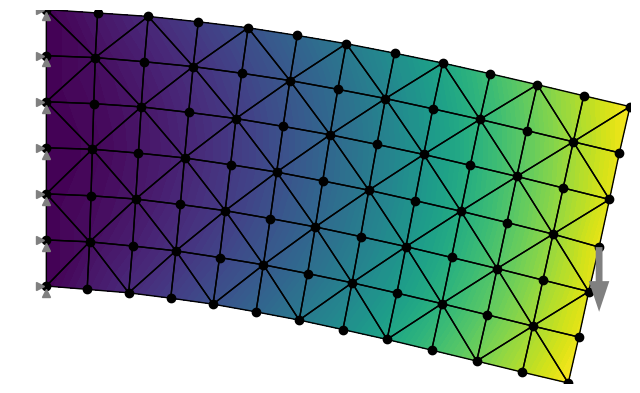

In [5]:
points, cells = meshzoo.rectangle_tri(
    np.linspace(0.0, 2.0, 13),
    np.linspace(0.0, 1.0, 7),
    variant="zigzag",
)
nodes = torch.tensor(points, dtype=torch.get_default_dtype())
elements = torch.tensor(cells.tolist())

cantilever = Planar(nodes, elements, material)

# Load at tip
tip = (nodes[:, 0] == 2.0) & (nodes[:, 1] == 0.5)
cantilever.forces[tip, 1] = -1.0

# Constrained displacement at left end
left = nodes[:, 0] == 0.0
cantilever.constraints[left, :] = True

# Thickness
cantilever.thickness[:] = 0.1

# Solve
u, f, σ, ε, α = cantilever.solve()

# Plot
u = u.cpu()
cantilever.nodes = cantilever.nodes.cpu()
cantilever.elements = cantilever.elements.cpu()
cantilever.forces = cantilever.forces.cpu()
cantilever.plot(u, node_property=torch.norm(u, dim=1), node_markers=True)

## A simple cantilever beam with second order triangles 

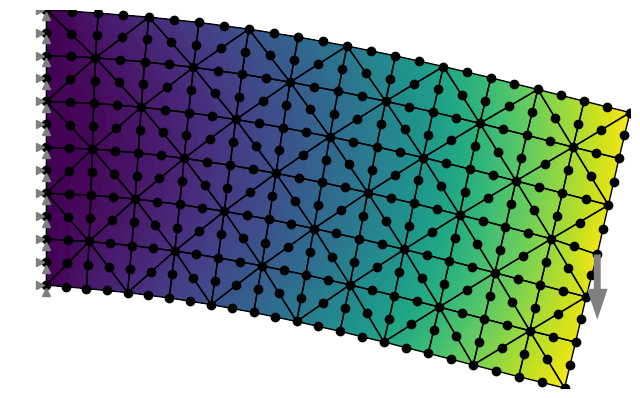

In [6]:
# Upgrade elements to quadratic
nodes, elements = linear_to_quadratic(nodes, elements)

# Create model
cantilever = Planar(nodes, elements, material)

# Load at tip
tip = (nodes[:, 0] == 2.0) & (nodes[:, 1] == 0.5)
cantilever.forces[tip, 1] = -1.0

# Constrained displacement at left end
left = nodes[:, 0] == 0.0
cantilever.constraints[left, :] = True

# Thickness
cantilever.thickness[:] = 0.1

# Solve
u, f, σ, ε, α = cantilever.solve()

# Plot
u = u.cpu()
cantilever.nodes = cantilever.nodes.cpu()
cantilever.elements = cantilever.elements.cpu()
cantilever.forces = cantilever.forces.cpu()
cantilever.plot(u, node_property=torch.norm(u, dim=1), node_markers=True)